#  Step 1 :Library & Data Import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [6]:
 pd.read_csv(r"iris Dataset.csv")

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


# Step 2 : Data Pre-Processing

In [7]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<AxesSubplot:>

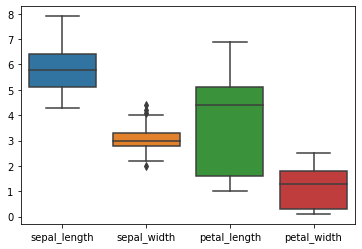

In [20]:
import seaborn as sns
sns.boxplot(data=Iris)

In [22]:
q1 = Iris['sepal_width'].quantile(0.25)
q3 = Iris['sepal_width'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

4.05

In [24]:
Iris['sepal_width']=np.where(Iris['sepal_width'] > upper_limit,upper_limit,Iris['sepal_width']) # upper limit

<AxesSubplot:>

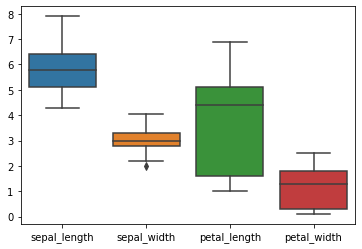

In [25]:
sns.boxplot(data=Iris)

In [29]:
q1 = Iris['sepal_width'].quantile(0.25)
q3 = Iris['sepal_width'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
#upper_limit = q3+1.5*iqr #acceptable range
low_limit

2.05

In [32]:
Iris['sepal_width']=np.where(Iris['sepal_width'] < low_limit,low_limit,Iris['sepal_width']) # upper limit

<AxesSubplot:>

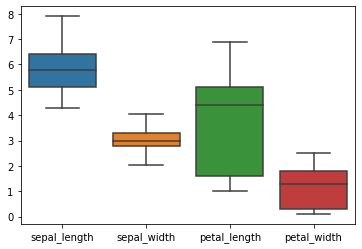

In [33]:
sns.boxplot(data=Iris)

In [15]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = Iris.drop(['class'],axis=1)
train_y = Iris['class']

# Train test split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=20)

In [16]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
2,4.6,3.1,1.5,0.2
5,4.6,3.4,1.4,0.3
49,7.0,3.2,4.7,1.4
113,5.8,2.8,5.1,2.4
44,4.8,3.0,1.4,0.3


# Step 4 : Scaling Data

In [17]:
from sklearn.preprocessing import StandardScaler ,minmax_scale
scaler = StandardScaler()   # converting data into Z-scale = X-mean / Standard Deviation
#scaler.fit(X_train)         # Mean = 0 & standard Deviation =1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[0:5]

array([[-1.57732321,  0.11294501, -1.28330215, -1.29331978],
       [-1.57732321,  0.76551617, -1.34183874, -1.16348845],
       [ 1.62609317,  0.33046873,  0.58986871,  0.26465617],
       [ 0.02438498, -0.53962616,  0.82401507,  1.56296946],
       [-1.31037184, -0.10457871, -1.34183874, -1.16348845]])

In [34]:
X_train.mean(axis=0)

array([ 1.06325205e-15,  3.41607085e-16, -1.19562480e-16,  2.13504428e-17])

In [35]:
X_train.std(axis=0)

array([1., 1., 1., 1.])

# Step 5 : Model Building 

In [36]:
# train the decision tree
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=6)
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

# Step 6 : Predictions on Train Dataset

In [37]:
X_train=pd.DataFrame(X_train,columns=['sepal_length','sepal_width','petal_length','petal_width'])
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-1.577323,0.112945,-1.283302,-1.293320
1,-1.577323,0.765516,-1.341839,-1.163488
2,1.626093,0.330469,0.589869,0.264656
3,0.024385,-0.539626,0.824015,1.562969
4,-1.310372,-0.104579,-1.341839,-1.163488


In [38]:
y_train.reset_index(drop=True, inplace=True)

In [39]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,-1.577323,0.112945,-1.283302,-1.293320,Iris-setosa
1,-1.577323,0.765516,-1.341839,-1.163488,Iris-setosa
2,1.626093,0.330469,0.589869,0.264656,Iris-versicolor
3,0.024385,-0.539626,0.824015,1.562969,Iris-virginica
4,-1.310372,-0.104579,-1.341839,-1.163488,Iris-setosa


In [40]:
train['Predicted']=model.predict(X_train)
train.head()

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,class,Predicted
0,-1.577323,0.112945,-1.283302,-1.293320,Iris-setosa,Iris-setosa
1,-1.577323,0.765516,-1.341839,-1.163488,Iris-setosa,Iris-setosa
2,1.626093,0.330469,0.589869,0.264656,Iris-versicolor,Iris-versicolor
3,0.024385,-0.539626,0.824015,1.562969,Iris-virginica,Iris-virginica
4,-1.310372,-0.104579,-1.341839,-1.163488,Iris-setosa,Iris-setosa


# Step 7 : Model Performance Metrics

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['class'],train['Predicted'])
print(confusion_matrix)

[[36  0  0]
 [ 0 31  1]
 [ 0  4 32]]


In [42]:
Accuracy_Train=((36+31+32)/(104)*100)
print(Accuracy_Train)

95.1923076923077


In [43]:
from sklearn.metrics import classification_report
print(classification_report(train['class'], train['Predicted']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        36
Iris-versicolor       0.89      0.97      0.93        32
 Iris-virginica       0.97      0.89      0.93        36

       accuracy                           0.95       104
      macro avg       0.95      0.95      0.95       104
   weighted avg       0.95      0.95      0.95       104



#  Step 8 : Predictions on Test Dataset

In [44]:
X_test=pd.DataFrame(X_test,columns=['sepal_length','sepal_width','petal_length','petal_width'])
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.642993,1.418087,-1.283302,-1.293320
1,0.825239,-0.322102,0.355722,0.134825
2,1.092190,-0.104579,0.414259,0.264656
3,1.893045,-0.104579,1.233771,0.524319
4,0.558288,-1.844768,0.472796,0.394487


In [45]:
y_test.reset_index(drop=True, inplace=True)

In [46]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.642993,1.418087,-1.283302,-1.293320,Iris-setosa
1,0.825239,-0.322102,0.355722,0.134825,Iris-versicolor
2,1.092190,-0.104579,0.414259,0.264656,Iris-versicolor
3,1.893045,-0.104579,1.233771,0.524319,Iris-virginica
4,0.558288,-1.844768,0.472796,0.394487,Iris-versicolor


In [47]:
test['Predicted']=model.predict(X_test)
test.head()

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,class,Predicted
0,-0.642993,1.418087,-1.283302,-1.293320,Iris-setosa,Iris-setosa
1,0.825239,-0.322102,0.355722,0.134825,Iris-versicolor,Iris-versicolor
2,1.092190,-0.104579,0.414259,0.264656,Iris-versicolor,Iris-versicolor
3,1.893045,-0.104579,1.233771,0.524319,Iris-virginica,Iris-virginica
4,0.558288,-1.844768,0.472796,0.394487,Iris-versicolor,Iris-versicolor


#  Step 9 : Model Performance Metrics on Test data 

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['class'],test['Predicted'])
print(confusion_matrix)

[[13  0  0]
 [ 0 18  0]
 [ 0  0 14]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(test['diagnosis_result'], test['Predicted']))

100.0

# Cross Validation Method  - Random concept

* To identify the best value of K

In [50]:
from sklearn.metrics import accuracy_score
for K in range(25):
    K_value = K+1
    model2 = KNeighborsClassifier(n_neighbors = K_value)
    model2.fit(X_train, y_train) 
    y_pred_Train= model2.predict(X_train)
    y_pred_test = model2.predict(X_test)
    print("Train Accuracy is ", 
          round(accuracy_score(y_train,y_pred_Train)*100,0), "      ","Test Accuracy is ", round(accuracy_score(y_test,y_pred_test)*100,0),"% for K-Value:",
          K_value)

Train Accuracy is  100.0        Test Accuracy is  96.0 % for K-Value: 1
Train Accuracy is  97.0        Test Accuracy is  96.0 % for K-Value: 2
Train Accuracy is  94.0        Test Accuracy is  96.0 % for K-Value: 3
Train Accuracy is  95.0        Test Accuracy is  96.0 % for K-Value: 4
Train Accuracy is  97.0        Test Accuracy is  100.0 % for K-Value: 5
Train Accuracy is  95.0        Test Accuracy is  100.0 % for K-Value: 6
Train Accuracy is  95.0        Test Accuracy is  98.0 % for K-Value: 7
Train Accuracy is  94.0        Test Accuracy is  96.0 % for K-Value: 8
Train Accuracy is  94.0        Test Accuracy is  96.0 % for K-Value: 9
Train Accuracy is  92.0        Test Accuracy is  93.0 % for K-Value: 10
Train Accuracy is  93.0        Test Accuracy is  96.0 % for K-Value: 11
Train Accuracy is  93.0        Test Accuracy is  96.0 % for K-Value: 12
Train Accuracy is  94.0        Test Accuracy is  96.0 % for K-Value: 13
Train Accuracy is  95.0        Test Accuracy is  96.0 % for K-Value: 1

# train the decision tree
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=8,metric='euclidean')
## Fit the model on the training data.
model.fit(X_train, y_train)

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 9)}


knn2 = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn2, 
                        param_grid,
                        cv=10,
                        verbose=1)
knn_gscv.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])},
             verbose=1)

In [52]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [53]:
knn_gscv.best_score_

0.9318181818181819